In [9]:
# Import the dependcies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the datetime module from the datetime library
from datetime import datetime 

In [19]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fb15583c337ed0493d5bc80802cc4b9b


In [21]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [23]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is uniqe, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

636

In [24]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters
record_count = 1
set_count = 1 

# Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 13 | teya
Processing Record 2 of Set 13 | maniitsoq
Processing Record 3 of Set 13 | punta arenas
Processing Record 4 of Set 13 | vardo
Processing Record 5 of Set 13 | hilo
Processing Record 6 of Set 13 | ribeira grande
Processing Record 7 of Set 13 | albany
Processing Record 8 of Set 13 | klooga
Processing Record 9 of Set 13 | ilulissat
Processing Record 10 of Set 13 | suratgarh
Processing Record 11 of Set 13 | port alfred
Processing Record 12 of Set 13 | jamestown
Processing Record 13 of Set 13 | hithadhoo
Processing Record 14 of Set 13 | mar del plata
Processing Record 15 of Set 13 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 13 | atuona
Processing Record 17 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 13 | sitka
Processing Record 19 of Set 13 | avarua
Processing Record 20 of Set 13 | forio
Processing Record 21 of Set 13 | port elizabeth
Pr

Processing Record 34 of Set 16 | narsaq
Processing Record 35 of Set 16 | orodara
Processing Record 36 of Set 16 | santa rosa
Processing Record 37 of Set 16 | state college
Processing Record 38 of Set 16 | gdynia
Processing Record 39 of Set 16 | natal
Processing Record 40 of Set 16 | san patricio
Processing Record 41 of Set 16 | northam
Processing Record 42 of Set 16 | zolotkovo
Processing Record 43 of Set 16 | roma
Processing Record 44 of Set 16 | dikson
Processing Record 45 of Set 16 | kirakira
Processing Record 46 of Set 16 | nome
Processing Record 47 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 16 | egvekinot
Processing Record 49 of Set 16 | jizan
Processing Record 50 of Set 16 | halalo
City not found. Skipping...
Processing Record 1 of Set 17 | esperance
Processing Record 2 of Set 17 | praia da vitoria
Processing Record 3 of Set 17 | jiuquan
Processing Record 4 of Set 17 | limoges
Processing Record 5 of Set 17 | tabarqah
City not found. Skipping..

Processing Record 18 of Set 20 | codrington
Processing Record 19 of Set 20 | beira
Processing Record 20 of Set 20 | kavieng
Processing Record 21 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 22 of Set 20 | port blair
Processing Record 23 of Set 20 | zastron
Processing Record 24 of Set 20 | hervey bay
Processing Record 25 of Set 20 | sotouboua
Processing Record 26 of Set 20 | calabozo
Processing Record 27 of Set 20 | attawapiskat
City not found. Skipping...
Processing Record 28 of Set 20 | kamenka
Processing Record 29 of Set 20 | kariba
Processing Record 30 of Set 20 | santa cruz
Processing Record 31 of Set 20 | meadville
Processing Record 32 of Set 20 | dingle
Processing Record 33 of Set 20 | cap malheureux
Processing Record 34 of Set 20 | comodoro rivadavia
Processing Record 35 of Set 20 | cabo san lucas
Processing Record 36 of Set 20 | kudat
Processing Record 37 of Set 20 | sayyan
Processing Record 38 of Set 20 | oranjemund
Processing Record 39 of Set 20 | m

Processing Record 6 of Set 24 | inverness
Processing Record 7 of Set 24 | blackfoot
Processing Record 8 of Set 24 | uglovskoye
Processing Record 9 of Set 24 | boke
Processing Record 10 of Set 24 | kudahuvadhoo
Processing Record 11 of Set 24 | les cayes
Processing Record 12 of Set 24 | navolato
Processing Record 13 of Set 24 | karauzyak
City not found. Skipping...
Processing Record 14 of Set 24 | batticaloa
Processing Record 15 of Set 24 | kerch
Processing Record 16 of Set 24 | olafsvik
Processing Record 17 of Set 24 | kouango
Processing Record 18 of Set 24 | mayang imphal
Processing Record 19 of Set 24 | vila
Processing Record 20 of Set 24 | envira
Processing Record 21 of Set 24 | soe
Processing Record 22 of Set 24 | bangassou
Processing Record 23 of Set 24 | san jeronimito
Processing Record 24 of Set 24 | snasa
Processing Record 25 of Set 24 | pitimbu
Processing Record 26 of Set 24 | omsukchan
Processing Record 27 of Set 24 | strai
Processing Record 28 of Set 24 | canico
Processing Re

In [25]:
# Convert the array of dictionaries o a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teya,60.38,92.63,8.85,93,98,3.58,RU,2020-11-05 21:11:01
1,Maniitsoq,65.42,-52.90,21.38,91,85,7.81,GL,2020-11-05 21:11:01
2,Punta Arenas,-53.15,-70.92,55.40,30,75,20.80,CL,2020-11-05 21:08:53
3,Vardo,70.37,31.11,33.80,87,40,9.17,NO,2020-11-05 21:11:01
4,Hilo,19.73,-155.09,84.20,62,40,8.05,US,2020-11-05 21:11:02
5,Ribeira Grande,38.52,-28.70,59.00,77,40,5.82,PT,2020-11-05 21:08:56
6,Albany,42.60,-73.97,66.20,45,75,11.41,US,2020-11-05 21:06:43
7,Klooga,59.32,24.21,48.20,87,0,13.87,EE,2020-11-05 21:11:02
8,Ilulissat,69.22,-51.10,17.60,67,75,18.34,GL,2020-11-05 21:11:02
9,Suratgarh,29.32,73.90,65.91,26,0,2.80,IN,2020-11-05 21:11:02


In [29]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Teya,RU,2020-11-05 21:11:01,60.38,92.63,8.85,93,98,3.58
1,Maniitsoq,GL,2020-11-05 21:11:01,65.42,-52.90,21.38,91,85,7.81
2,Punta Arenas,CL,2020-11-05 21:08:53,-53.15,-70.92,55.40,30,75,20.80
3,Vardo,NO,2020-11-05 21:11:01,70.37,31.11,33.80,87,40,9.17
4,Hilo,US,2020-11-05 21:11:02,19.73,-155.09,84.20,62,40,8.05
5,Ribeira Grande,PT,2020-11-05 21:08:56,38.52,-28.70,59.00,77,40,5.82
6,Albany,US,2020-11-05 21:06:43,42.60,-73.97,66.20,45,75,11.41
7,Klooga,EE,2020-11-05 21:11:02,59.32,24.21,48.20,87,0,13.87
8,Ilulissat,GL,2020-11-05 21:11:02,69.22,-51.10,17.60,67,75,18.34
9,Suratgarh,IN,2020-11-05 21:11:02,29.32,73.90,65.91,26,0,2.80


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/05/20'

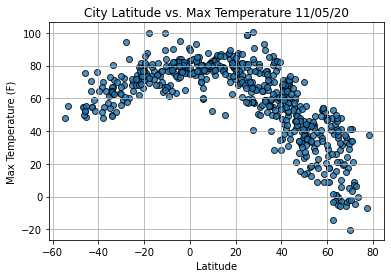

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

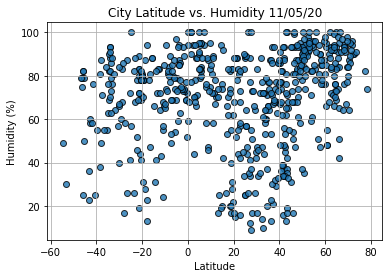

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

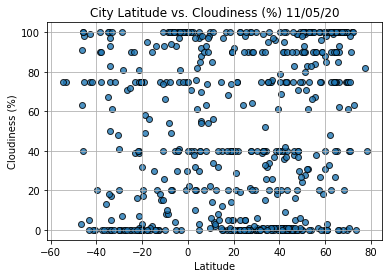

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

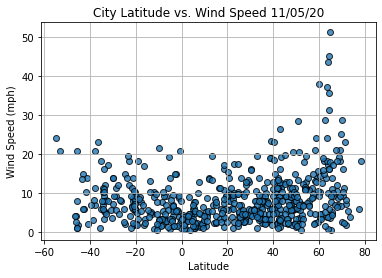

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()